In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


<h1>Rain in Australia dataset contains about 10 years of daily weather observations from numerous Australian weather stations.



<h2> Here I am tasked with creating a fully automated system that can use today's weather data for a given location to predict whether it will rain or not at the location tommorow I 

In [2]:
df=pd.read_csv("/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# required libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib

In [4]:
df.shape

(145460, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<Axes: xlabel='Date', ylabel='count'>

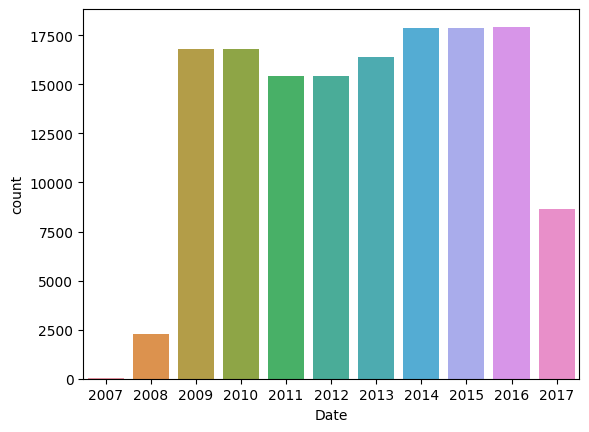

In [6]:
sns.countplot(x=pd.to_datetime(df.Date).dt.year)

<h1>FEATURE ENGINEERING

<b>TRAINING, VALIDATION AND TEST SETS</b><br>

Here I am considering all data <br>
until 2014 - for training set<br>
2015 - for validation<br>
2016 and 2017 - for testing


In [7]:
numeric_columns=df.select_dtypes(include=np.number).columns.tolist()
numeric_columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [8]:
categorical_columns=df.select_dtypes("object").columns.tolist()
categorical_columns

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [9]:
from sklearn.impute import SimpleImputer
numeric_imputer = SimpleImputer(strategy='mean').fit(df[numeric_columns])

In [10]:
df[numeric_columns]=numeric_imputer.transform(df[numeric_columns])
df[numeric_columns]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.468232,7.611178,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.100000,0.0,5.468232,7.611178,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.700000,0.0,5.468232,7.611178,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.000000,0.0,5.468232,7.611178,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.300000,1.0,5.468232,7.611178,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,5.468232,7.611178,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
145456,3.6,25.300000,0.0,5.468232,7.611178,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
145457,5.4,26.900000,0.0,5.468232,7.611178,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1
145458,7.8,27.000000,0.0,5.468232,7.611178,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(df[numeric_columns])

In [12]:
df[numeric_columns]=scaler.transform(df[numeric_columns])
df[numeric_columns]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.266509,0.533081,0.000000,0.037712,0.524909,0.193798,0.100000,0.126437,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589
145456,0.285377,0.568998,0.000000,0.037712,0.524909,0.124031,0.100000,0.103448,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896
145457,0.327830,0.599244,0.000000,0.037712,0.524909,0.240310,0.069231,0.103448,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607
145458,0.384434,0.601134,0.000000,0.037712,0.524909,0.170543,0.100000,0.080460,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687


In [13]:
year= pd.to_datetime(df["Date"]).dt.year

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_columns = encoder.fit_transform(df[categorical_columns])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
encoded_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(categorical_columns))

In [16]:
encoded_df

,Date_2007-11-02,Date_2007-11-03,Date_2007-11-04,Date_2007-11-05,Date_2007-11-06,Date_2007-11-07,Date_2007-11-08,Date_2007-11-09,Date_2007-11-10,Date_2007-11-11,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
145457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
145458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df[categorical_columns]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,SE,ENE,No,No
145456,2017-06-22,Uluru,NNW,SE,N,No,No
145457,2017-06-23,Uluru,N,SE,WNW,No,No
145458,2017-06-24,Uluru,SE,SSE,N,No,No


In [18]:
data_encoded = pd.concat([df.drop(columns=categorical_columns), encoded_df], axis=1)
data_encoded.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
data_encoded = pd.concat([data_encoded, year], axis=1)
data_encoded.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan,Date
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2008
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2008


In [20]:
df=data_encoded
df["Date"].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007],
      dtype=int32)

In [21]:
train_df=df[df["Date"]<2015]
train_df.shape
train_df.drop("Date",axis=1,inplace=True)
train_df.head()

/tmp/ipykernel_20/3198694541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop("Date",axis=1,inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan
0,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,0.275862,0.71,0.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,0.252874,0.44,0.25,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,0.298851,0.38,0.30,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,0.103448,0.45,0.16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,0.229885,0.82,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
validation_df=df[df["Date"]==2015]
validation_df.shape
validation_df.drop("Date",axis=1,inplace=True)
validation_df.head()

/tmp/ipykernel_20/3198962093.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_df.drop("Date",axis=1,inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan
2133,0.469340,0.724008,0.0,0.037712,0.524909,0.186047,0.053846,0.126437,0.45,0.14,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2134,0.566038,0.839319,0.0,0.037712,0.524909,0.387597,0.069231,0.103448,0.45,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2135,0.603774,0.814745,0.0,0.037712,0.524909,0.325581,0.153846,0.229885,0.35,0.19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2136,0.813679,0.716446,0.0,0.037712,0.524909,0.271318,0.053846,0.080460,0.46,0.37,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2137,0.648585,0.756144,0.0,0.037712,0.524909,0.209302,0.053846,0.103448,0.60,0.34,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
test_df=df[df["Date"]>2015]
test_df.shape
test_df.drop("Date",axis=1,inplace=True)
test_df.head()

/tmp/ipykernel_20/3819355987.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop("Date",axis=1,inplace=True)


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_Yes,RainToday_nan,RainTomorrow_Yes,RainTomorrow_nan
2498,0.681604,0.801512,0.000000,0.037712,0.524909,0.372093,0.000000,0.080460,0.46,0.17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2499,0.693396,0.725898,0.001078,0.037712,0.524909,0.341085,0.069231,0.195402,0.54,0.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2500,0.634434,0.527410,0.005930,0.037712,0.524909,0.325581,0.084615,0.448276,0.62,0.67,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2501,0.608491,0.538752,0.042049,0.037712,0.524909,0.255814,0.069231,0.195402,0.74,0.65,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2502,0.566038,0.523629,0.018329,0.037712,0.524909,0.193798,0.046154,0.103448,0.92,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [24]:
train_df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm',
       ...
       'WindDir3pm_SSW', 'WindDir3pm_SW', 'WindDir3pm_W', 'WindDir3pm_WNW',
       'WindDir3pm_WSW', 'WindDir3pm_nan', 'RainToday_Yes', 'RainToday_nan',
       'RainTomorrow_Yes', 'RainTomorrow_nan'],
      dtype='object', length=3551)

In [25]:
#TRAIN test Validation splitting

x_train=train_df.drop(["RainTomorrow_Yes"],axis=True)
y_train=train_df["RainTomorrow_Yes"]

x_test=test_df.drop(["RainTomorrow_Yes"],axis=True)
y_test=test_df["RainTomorrow_Yes"]

x_val=validation_df.drop(["RainTomorrow_Yes"],axis=True)
y_val=validation_df["RainTomorrow_Yes"]

In [26]:
df["RainTomorrow_Yes"].unique()

array([0., 1.])

In [27]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)

In [28]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds=model.predict(x_train)

In [30]:
accuracy_score(y_train,train_preds)

1.0